In [1]:
%matplotlib inline
import os.path as op
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from nilearn import image, masking, plotting
import pandas as pd

import godec
from godec.tests.utils import get_test_data_path

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
in_dir = get_test_data_path()
in_file = op.join(in_dir, "sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_res-5mm_bold.nii.gz")
mask = op.join(in_dir, "sub-04570_task-rest_space-scanner_desc-brain_res-5mm_mask.nii.gz")

In [3]:
data = masking.apply_mask(in_file, mask)

# Standard GoDec

In [4]:
lowrank, sparse, error, rmse = godec.standard_godec(data, rank=4)
lowrank = masking.unmask(lowrank, mask)
sparse = masking.unmask(sparse, mask)
#error = masking.unmask(error, mask)

imgs = {
    "Original Data": in_file,
    "Low-Rank Components": lowrank,
    "Sparse Components": sparse,
}
print(rmse)

[2.4686728556253337e-17]


<ipython-input-5-db2f7ed630eb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


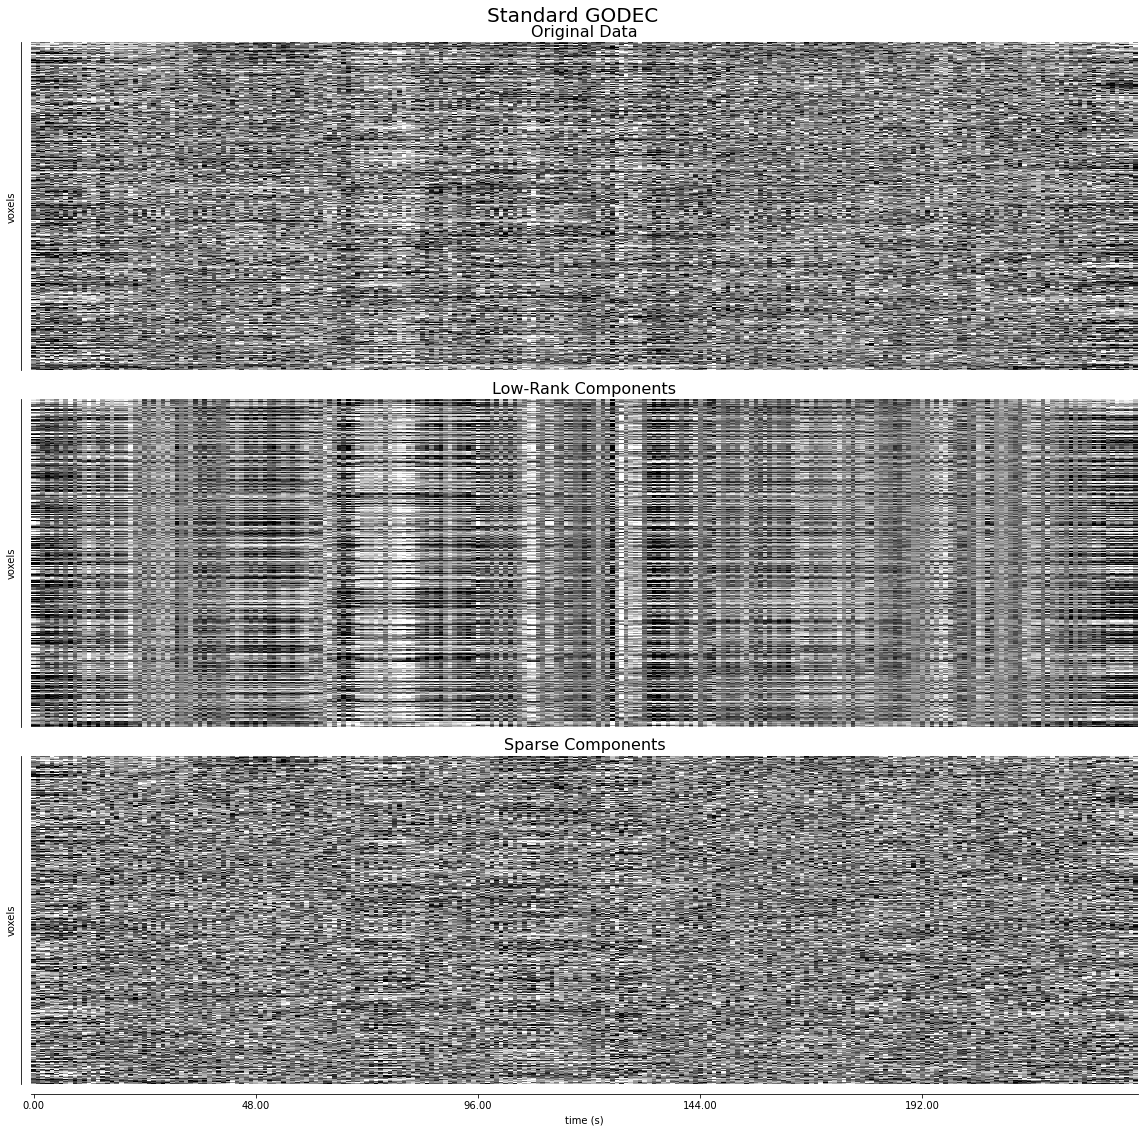

In [5]:
fig, axes = plt.subplots(figsize=(16, 16), nrows=3)

for i, (name, img) in enumerate(imgs.items()):
    plotting.plot_carpet(img, mask_img=mask, axes=axes[i], figure=fig)
    axes[i].set_title(name, fontsize=16)

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].spines["bottom"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)

fig.suptitle("Standard GODEC", fontsize=20)
fig.tight_layout()
fig.show()

# Greedy Semi-Soft GoDec

In [6]:
out = godec.greedy_semisoft_godec(data, ranks=[4])
lowrank, sparse, error = out[4]
lowrank = masking.unmask(lowrank, mask)
sparse = masking.unmask(sparse, mask)
error = masking.unmask(error, mask)

imgs = {
    "Original Data": in_file,
    "Low-Rank Components": lowrank,
    "Sparse Components": sparse,
}

/Users/taylor/Documents/tsalo/godec/godec/godec.py:273: RuntimeWarning: divide by zero encountered in double_scalars
  rel_drp = (rankmax - 1) * dmx / (sum(drops) - dmx)
/Users/taylor/Documents/tsalo/godec/godec/godec.py:289: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = error[ii] / error[ii - 1]


<ipython-input-7-649cd7b611a6>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


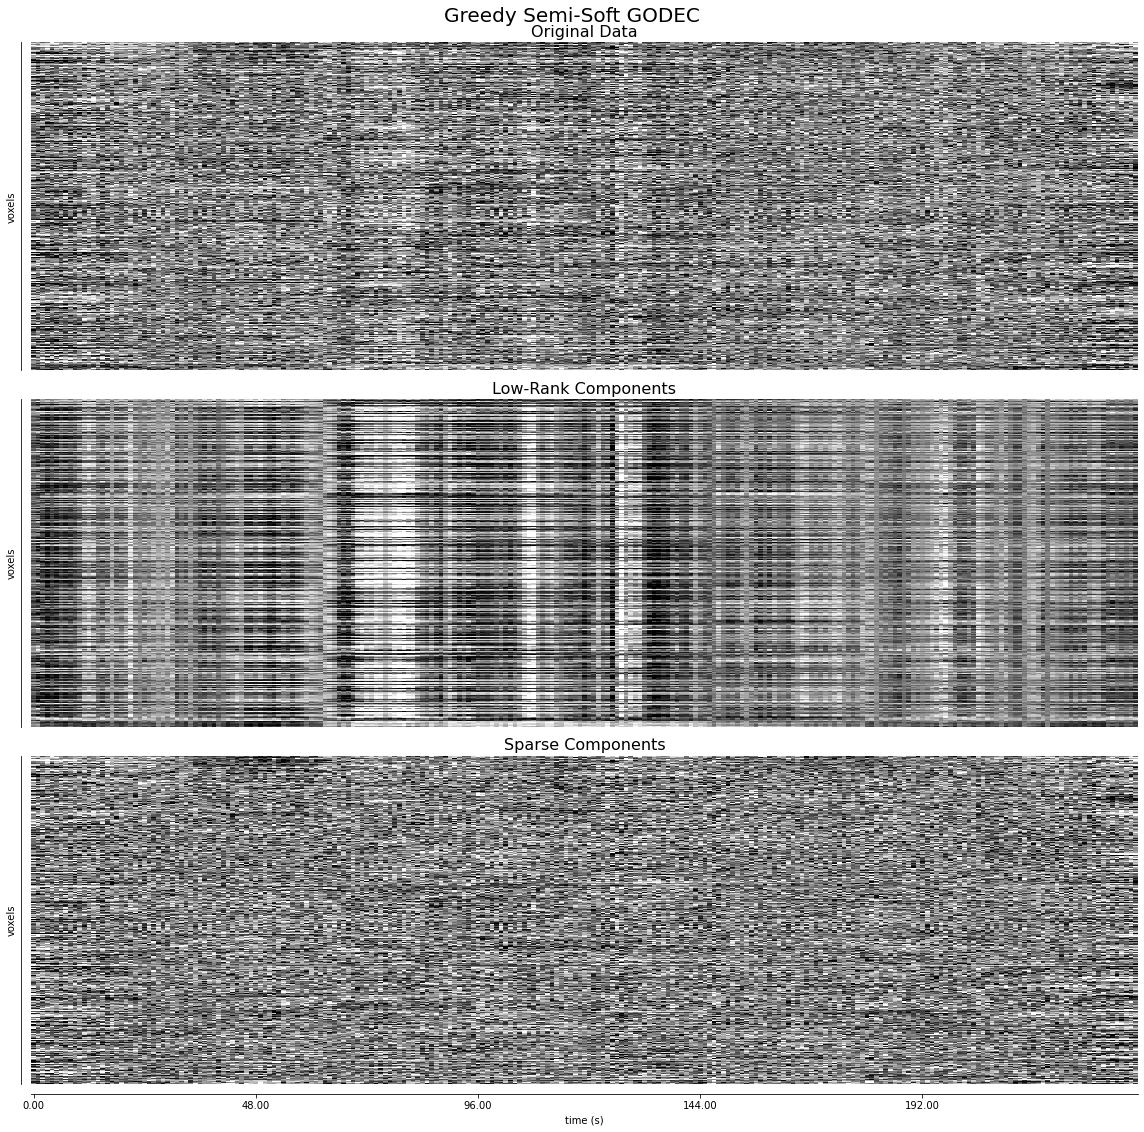

In [7]:
fig, axes = plt.subplots(figsize=(16, 16), nrows=3)

for i, (name, img) in enumerate(imgs.items()):
    plotting.plot_carpet(img, mask_img=mask, axes=axes[i], figure=fig)
    axes[i].set_title(name, fontsize=16)

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].spines["bottom"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)

fig.suptitle("Greedy Semi-Soft GODEC", fontsize=20)
fig.tight_layout()
fig.show()